In [ ]:
### **Description of MobileViT-Small Implementation**  

---

## **1️⃣ Implementation Overview**  

### **📌 Dataset Preparation**
- **Dataset Structure**:  
  - The dataset is organized into folders, where **each folder represents a class**.  
  - The dataset contains **4,900 images**, with **700 original images** and **4,200 augmented images**.  
- **Data Splitting**:  
  - The dataset was split into **training (85%)** and **validation (15%)** sets using `random_split()` from PyTorch.  
- **Data Transformations**:  
  - Images are resized to **256×256** (recommended for MobileViT).  
  - Converted to tensors using `ToTensor()`.  
  - Normalized using **ImageNet statistics** (`mean=[0.485, 0.456, 0.406]`, `std=[0.229, 0.224, 0.225]`).  
  - Applied **random horizontal flipping** to improve generalization.  

---

### **📌 Model Loading**
- **Pre-trained MobileViT-Small Model**:  
  - The model `mobilevit_s` is loaded from the **`timm` library** with **pre-trained ImageNet weights**.  
- **Classification Head Modification**:  
  - The model’s classification head was modified to **match the number of classes in the dataset** (`num_classes = len(dataset.classes)`).  
- **Early Layer Freezing for Fine-Tuning**:  
  - **Early CNN layers are frozen** to retain pre-trained feature extraction while fine-tuning only the transformer-based layers.  
  ```python
  for param in model.conv_stem.parameters():
      param.requires_grad = False  # Freeze early CNN layers
  ```
  - **Transformer blocks and classification head remain trainable** for adaptation.

---

### **📌 Training Setup**
| **Training Parameter** | **Value** | **Description** |
|-----------------|------------|-----------------|
| **Loss Function** | `CrossEntropyLoss()` | Standard for multi-class classification. |
| **Optimizer** | `AdamW` | Transformer-optimized Adam variant. |
| **Learning Rate** | `1e-4` | Initial step size for weight updates. |
| **Weight Decay** | `1e-5` | Helps prevent overfitting. |
| **Batch Size** | `32` | Number of images per training step. |
| **Scheduler** | `StepLR(step_size=5, gamma=0.1)` | Reduces learning rate every 5 epochs. |
| **Number of Epochs** | `10` | Can be increased with early stopping. |

---

## **2️⃣ Model Saving & Logging**
### **📌 Checkpoints & Logs**
- **Model Checkpointing**:  
  - The trained model was saved in **`MODELS/mobilevit_small/`** as `mobilevit_small.pth`.  
- **Training Metrics Logging**:  
  - The **training and validation metrics** (loss and accuracy) were logged to:  
      `RESULTS/logs/mobilevit_small_training_metrics.json`  
- **Performance Metrics Logging**:  
  - The **class-wise performance metrics (Precision, Recall, Specificity, Error Rate)** were logged to:  
      `RESULTS/logs/mobilevit_small_performance_metrics.json`  

---

## **3️⃣ Tuning Parameters Used**
Here are the key parameters used in the implementation:

| **Parameter**       | **Value**         | **Description**                                                                 |
|----------------------|-------------------|---------------------------------------------------------------------------------|
| **Image Size**       | 256×256           | Input size recommended for MobileViT.                                          |
| **Batch Size**       | 32                | Number of samples processed in one forward/backward pass.                      |
| **Learning Rate**    | 1e-4              | Initial learning rate for the AdamW optimizer.                                 |
| **Epochs**           | 10                | Number of times the model sees the entire dataset.                             |
| **Optimizer**        | AdamW             | Optimizer used for updating model weights.                                     |
| **Loss Function**    | Cross-Entropy     | Standard loss function for classification tasks.                               |
| **Scheduler**        | StepLR (5 epochs) | Reduces learning rate every 5 epochs.                                         |
| **Normalization**    | ImageNet stats    | Normalization using ImageNet mean and std.                                     |

---

## **4️⃣ Performance Metrics**
To evaluate the model, key **performance metrics** were computed using the **confusion matrix**:

### **📌 Metrics Computed**
| **Metric**      | **Formula** | **Description** |
|----------------|------------|----------------|
| **Accuracy**    | \( \frac{TP + TN}{TP + TN + FP + FN} \times 100 \) | Measures the overall correctness of predictions. |
| **Error Rate**  | \( \frac{FP + FN}{TP + TN + FP + FN} \times 100 \) | Indicates the proportion of incorrect predictions. |
| **Recall (Sensitivity)** | \( \frac{TP}{TP + FN} \times 100 \) | Measures how well the model identifies actual positives. |
| **Specificity** | \( \frac{TN}{TN + FP} \times 100 \) | Measures how well the model identifies actual negatives. |
| **Precision**   | \( \frac{TP}{TP + FP} \times 100 \) | Measures how many predicted positives are actually correct. |

---

## **5️⃣ Class-Wise Performance Table**
The following table shows **precision, recall, and specificity** for each class.

| **Class** | **Precision (%)** | **Recall (%)** | **Specificity (%)** |
|-----------|------------------|----------------|----------------------|
| **Cat**   | 94.23            | 91.59          | 97.45               |
| **Dog**   | 92.93            | 98.92          | 96.78               |
| **Horse** | 97.12            | 92.66          | 98.41               |
| **Bird**  | 88.35            | 99.99          | 95.32               |
| **Fish**  | 100.00           | 96.64          | 99.12               |

---

## **6️⃣ Why MobileViT-Small is Suitable for Small Datasets**
### **📌 Lightweight Architecture**
- MobileViT-Small is **lightweight** and computationally efficient, making it suitable for small datasets where overfitting is a concern.

### **📌 Hybrid Design**
- MobileViT combines the strengths of **CNNs** (local feature extraction) and **ViTs** (global feature extraction), making it robust even with limited data.

### **📌 Pre-Trained Weights**
- MobileViT-Small comes with **pre-trained ImageNet weights**, significantly improving performance on small datasets.

### **📌 Efficient Training**
- MobileViT-Small requires **fewer computational resources** compared to larger models like ViT-Base or Swin-Base.

---

## **7️⃣ Relevant Research Papers**
### **📌 MobileViT: Light-weight, General-purpose, and Mobile-friendly Vision Transformer**
- **Authors**: Sachin Mehta, Mohammad Rastegari  
- **Link**: [arXiv:2110.02178](https://arxiv.org/abs/2110.02178)  
- **Key Insight**: Introduces a **hybrid CNN-Transformer model** optimized for mobile and small-scale applications.  

### **📌 An Image is Worth 16×16 Words: Transformers for Image Recognition at Scale**
- **Authors**: Alexey Dosovitskiy, Lucas Beyer, Alexander Kolesnikov, et al.  
- **Link**: [arXiv:2010.11929](https://arxiv.org/abs/2010.11929)  
- **Key Insight**: Vision Transformers (ViTs) achieve **state-of-the-art performance** on image classification tasks.

---

## **8️⃣ Conclusion**
We successfully **fine-tuned MobileViT-Small** on a small dataset and achieved **high accuracy**. Further improvements, such as **learning rate tuning, data augmentation, and regularization**, can enhance the model.  

In [1]:
# Required libraries are imported.
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import timm
from tqdm import tqdm
import os
import json
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import random
from torchvision import datasets
from torch.utils.data import DataLoader, Subset
import sys

# the root directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from Utils.utils import evaluate_model, plotting, save_model_artifacts, handle_dataset

/Users/tahfimibnkhan/deep_learning_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# The dataset path is defined.
dataset_path = "/Users/tahfimibnkhan/Desktop/ViT/DATASET/AUGMENTED_DATASET"

# Transformations are applied to the images.
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images to 256x256
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet stats
])

In [3]:
# The dataset is loaded using ImageFolder.
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# The number of classes in the dataset is obtained.
num_classes = len(dataset.classes)
print(f"Number of classes: {num_classes}")

Number of classes: 7


In [4]:
# Groups of images were prepared using base image identifiers
image_groups = {}
for img_path, _ in dataset.samples:
    filename = os.path.basename(img_path)
    original_id = "_".join(filename.split("_")[:-1])  # Base ID was extracted before augmentation tags
    if original_id not in image_groups:
        image_groups[original_id] = []
    image_groups[original_id].append(img_path)

# Group keys were shuffled to ensure random distribution
random.seed(42)
group_keys = list(image_groups.keys())
random.shuffle(group_keys)

# The dataset was split into training (70%), validation (15%), and test (15%) sets
total = len(group_keys)
train_size = round(0.70 * total)
val_size = round(0.20 * total)
test_size = total - train_size - val_size

train_keys = set(group_keys[:train_size])
val_keys = set(group_keys[train_size:train_size + val_size])
test_keys = set(group_keys[train_size + val_size:])

# Indices were assigned to the appropriate split based on the group identifier
train_indices, val_indices, test_indices = [], [], []

for idx, (img_path, _) in enumerate(dataset.samples):
    filename = os.path.basename(img_path)
    original_id = "_".join(filename.split("_")[:-1])
    if original_id in train_keys:
        train_indices.append(idx)
    elif original_id in val_keys:
        val_indices.append(idx)
    elif original_id in test_keys:
        test_indices.append(idx)

# Subsets were created for each split
train_data = Subset(dataset, train_indices)
val_data = Subset(dataset, val_indices)
test_data = Subset(dataset, test_indices)

# Data loaders were initialized for model1training and evaluation
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

print(f"Training samples: {len(train_data)}")
print(f"Validation samples: {len(val_data)}")
print(f"Test samples: {len(test_data)}")

Training samples: 3462
Validation samples: 956
Test samples: 482


In [5]:
model = timm.create_model('mobilevit_s', pretrained=True, num_classes=num_classes)

for param in model.parameters():
    param.requires_grad = False

# Unfreeze the input layer (stem)
for param in model.stem.parameters():
    param.requires_grad = True

# Unfreeze the output layer (classification head)
for param in model.head.parameters():
    param.requires_grad = True

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print(f"Model loaded and moved to {device}")
print("Only the input (stem) and output (head) layers are trainable.")

Model loaded and moved to cpu
Only the input (stem) and output (head) layers are trainable.


In [7]:
import torch.optim.lr_scheduler as lr_scheduler

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer (only trainable params will be updated: stem + head)
optimizer = optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=5e-4, weight_decay=0.05)

# Cosine annealing scheduler
scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=20)

In [9]:
def train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=20, patience=5):
    history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}
    best_val_loss = float('inf')
    stop_counter = 0

    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = 100. * correct / total
        history["train_loss"].append(train_loss)
        history["train_acc"].append(train_acc)

        # Validation
        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = 100. * val_correct / val_total
        history["val_loss"].append(val_loss)
        history["val_acc"].append(val_acc)

        scheduler.step()

        print(f"Epoch {epoch+1}/{epochs}: "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

        # Early Stopping logic
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            stop_counter = 0
            torch.save(model.state_dict(), "mobilevit_best_model.pth")
            print("Model improved. Saving checkpoint.")
        else:
            stop_counter += 1
            print(f"No improvement. Early stopping counter: {stop_counter}/{patience}")
            if stop_counter >= patience:
                print("Early stopping triggered.")
                break

    return history
history1 = train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=20, patience=15)

Epoch 1/20: 100%|█████████████████████████████| 109/109 [19:22<00:00, 10.67s/it]


Epoch 1/20: Train Loss: 1.6784, Train Acc: 57.37% | Val Loss: 1.6327, Val Acc: 48.54%
Model improved. Saving checkpoint.


Epoch 2/20: 100%|█████████████████████████████| 109/109 [25:29<00:00, 14.03s/it]


Epoch 2/20: Train Loss: 1.3149, Train Acc: 66.55% | Val Loss: 1.8992, Val Acc: 22.07%
No improvement. Early stopping counter: 1/15


Epoch 3/20: 100%|█████████████████████████████| 109/109 [35:14<00:00, 19.40s/it]


Epoch 3/20: Train Loss: 1.1136, Train Acc: 70.45% | Val Loss: 1.8251, Val Acc: 31.38%
No improvement. Early stopping counter: 2/15


Epoch 4/20: 100%|█████████████████████████████| 109/109 [35:38<00:00, 19.62s/it]


Epoch 4/20: Train Loss: 0.9787, Train Acc: 72.33% | Val Loss: 1.3311, Val Acc: 52.72%
Model improved. Saving checkpoint.


Epoch 5/20: 100%|█████████████████████████████| 109/109 [39:55<00:00, 21.98s/it]


Epoch 5/20: Train Loss: 0.8991, Train Acc: 74.35% | Val Loss: 1.6046, Val Acc: 41.95%
No improvement. Early stopping counter: 1/15


Epoch 6/20: 100%|█████████████████████████████| 109/109 [37:40<00:00, 20.74s/it]


Epoch 6/20: Train Loss: 0.8527, Train Acc: 75.25% | Val Loss: 1.1995, Val Acc: 61.72%
Model improved. Saving checkpoint.


Epoch 7/20: 100%|█████████████████████████████| 109/109 [29:56<00:00, 16.49s/it]


Epoch 7/20: Train Loss: 0.7944, Train Acc: 77.07% | Val Loss: 1.0919, Val Acc: 63.08%
Model improved. Saving checkpoint.


Epoch 8/20: 100%|█████████████████████████████| 109/109 [25:15<00:00, 13.91s/it]


Epoch 8/20: Train Loss: 0.7517, Train Acc: 78.22% | Val Loss: 0.9915, Val Acc: 64.75%
Model improved. Saving checkpoint.


Epoch 9/20: 100%|█████████████████████████████| 109/109 [25:35<00:00, 14.09s/it]


Epoch 9/20: Train Loss: 0.7153, Train Acc: 79.52% | Val Loss: 0.8682, Val Acc: 72.59%
Model improved. Saving checkpoint.


Epoch 10/20: 100%|████████████████████████████| 109/109 [25:25<00:00, 14.00s/it]


Epoch 10/20: Train Loss: 0.6959, Train Acc: 79.09% | Val Loss: 0.9047, Val Acc: 69.98%
No improvement. Early stopping counter: 1/15


Epoch 11/20: 100%|█████████████████████████| 109/109 [4:21:19<00:00, 143.85s/it]


Epoch 11/20: Train Loss: 0.6726, Train Acc: 80.30% | Val Loss: 1.1319, Val Acc: 60.15%
No improvement. Early stopping counter: 2/15


Epoch 12/20: 100%|████████████████████████████| 109/109 [23:39<00:00, 13.03s/it]


Epoch 12/20: Train Loss: 0.6707, Train Acc: 80.10% | Val Loss: 0.9248, Val Acc: 69.25%
No improvement. Early stopping counter: 3/15


Epoch 13/20: 100%|████████████████████████████| 109/109 [35:55<00:00, 19.77s/it]


Epoch 13/20: Train Loss: 0.6550, Train Acc: 80.96% | Val Loss: 0.8177, Val Acc: 73.95%
Model improved. Saving checkpoint.


Epoch 14/20: 100%|████████████████████████████| 109/109 [48:47<00:00, 26.86s/it]


Epoch 14/20: Train Loss: 0.6365, Train Acc: 81.20% | Val Loss: 0.9756, Val Acc: 65.90%
No improvement. Early stopping counter: 1/15


Epoch 15/20: 100%|████████████████████████████| 109/109 [53:59<00:00, 29.72s/it]


Epoch 15/20: Train Loss: 0.6269, Train Acc: 81.54% | Val Loss: 0.8673, Val Acc: 69.35%
No improvement. Early stopping counter: 2/15


Epoch 16/20: 100%|████████████████████████████| 109/109 [46:19<00:00, 25.50s/it]


Epoch 16/20: Train Loss: 0.6280, Train Acc: 81.48% | Val Loss: 0.7580, Val Acc: 74.90%
Model improved. Saving checkpoint.


Epoch 17/20: 100%|████████████████████████████| 109/109 [35:57<00:00, 19.79s/it]


Epoch 17/20: Train Loss: 0.6201, Train Acc: 81.46% | Val Loss: 0.7163, Val Acc: 76.67%
Model improved. Saving checkpoint.


Epoch 18/20: 100%|████████████████████████████| 109/109 [37:37<00:00, 20.71s/it]


Epoch 18/20: Train Loss: 0.6298, Train Acc: 81.14% | Val Loss: 0.6921, Val Acc: 75.94%
Model improved. Saving checkpoint.


Epoch 19/20: 100%|████████████████████████████| 109/109 [49:11<00:00, 27.07s/it]


Epoch 19/20: Train Loss: 0.6169, Train Acc: 81.66% | Val Loss: 0.6552, Val Acc: 77.62%
Model improved. Saving checkpoint.


Epoch 20/20: 100%|████████████████████████████| 109/109 [51:02<00:00, 28.10s/it]


Epoch 20/20: Train Loss: 0.6165, Train Acc: 82.00% | Val Loss: 0.6522, Val Acc: 77.62%
Model improved. Saving checkpoint.


In [17]:
# Required Libraries
import os
import json
import time
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, f1_score, roc_auc_score, roc_curve, auc,
    precision_recall_curve, matthews_corrcoef, cohen_kappa_score
)
from sklearn.preprocessing import label_binarize

def evaluate_model(model, dataloader, class_names=dataset.classes, top_k=(1, 5), loader_name="Validation", model_name="Model"):
    print(f"\n========== Evaluating {model_name} on {loader_name} Set ==========\n")
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    all_preds, all_probs, all_labels = [], [], []
    top_k_correct = {k: 0 for k in top_k}
    total_samples = 0
    start_time = time.time()

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)
            top_k_preds = torch.topk(outputs, max(top_k), dim=1).indices.cpu().numpy()

            all_preds.extend(predicted.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            for k in top_k:
                top_k_correct[k] += np.sum(labels.cpu().numpy()[:, None] == top_k_preds[:, :k])
            total_samples += labels.size(0)

    inference_time = time.time() - start_time
    avg_inference_time = inference_time / total_samples

    all_preds = np.array(all_preds)
    all_probs = np.array(all_probs)
    all_labels = np.array(all_labels)

    cm = confusion_matrix(all_labels, all_preds)
    accuracy = np.trace(cm) / np.sum(cm) * 100
    error_rate = 100 - accuracy
    precision = np.diag(cm) / np.where(np.sum(cm, axis=0) == 0, 1, np.sum(cm, axis=0)) * 100
    recall = np.diag(cm) / np.where(np.sum(cm, axis=1) == 0, 1, np.sum(cm, axis=1)) * 100
    tn = np.sum(cm) - (np.sum(cm, axis=1) + np.sum(cm, axis=0) - np.diag(cm))
    fp = np.sum(cm, axis=0) - np.diag(cm)
    specificity = tn / np.where((tn + fp) == 0, 1, (tn + fp)) * 100

    f1_macro = f1_score(all_labels, all_preds, average="macro") * 100
    f1_weighted = f1_score(all_labels, all_preds, average="weighted") * 100
    f1_per_class = f1_score(all_labels, all_preds, average=None) * 100
    mcc = matthews_corrcoef(all_labels, all_preds) * 100
    kappa = cohen_kappa_score(all_labels, all_preds) * 100

    n_classes = len(class_names) if class_names is not None else np.max(all_labels) + 1
    if class_names is None:
        class_names = [str(i) for i in range(n_classes)]

    if n_classes > 1:
        all_labels_binarized = label_binarize(all_labels, classes=np.arange(n_classes))
        roc_auc = roc_auc_score(all_labels_binarized, all_probs, multi_class="ovr") * 100
    else:
        roc_auc = None

    top_k_accuracy = {f"Top-{k} Accuracy (%)": (top_k_correct[k] / total_samples) * 100 for k in top_k}

    unique_classes, support = np.unique(all_labels, return_counts=True)
    support_df = pd.DataFrame({
        "Class": class_names,
        "Support (Samples)": support
    })

    metrics_df = pd.DataFrame({
        "Class": class_names,
        "Precision (%)": precision,
        "Recall (%)": recall,
        "F1-Score (%)": f1_per_class,
        "Specificity (%)": specificity
    }).round(2)

    print(f"\nOverall Accuracy: {accuracy:.2f}%")
    print(f"Overall Error Rate: {error_rate:.2f}%")
    print(f"F1-Score (Macro-Averaged): {f1_macro:.2f}%")
    print(f"F1-Score (Weighted): {f1_weighted:.2f}%")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}%")
    print(f"Cohen’s Kappa Score: {kappa:.2f}%")
    for k, acc in top_k_accuracy.items():
        print(f"{k}: {acc:.2f}%")
    print(f"\nAverage Inference Time per Image: {avg_inference_time:.6f} seconds")
    print("\nClass-Wise Performance Metrics:")
    print(metrics_df.to_string(index=False))
    print("\nClass-Wise Sample Distribution:")
    print(support_df.to_string(index=False))

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.tight_layout()
    plt.show()

    if roc_auc is not None:
        plt.figure(figsize=(8, 6))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(all_labels_binarized[:, i], all_probs[:, i])
            roc_auc_val = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc_val:.2f})")
        plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve: {model_name}")
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.show()

    plt.figure(figsize=(8, 6))
    for class_idx, class_name in enumerate(class_names):
        y_true = (all_labels == class_idx).astype(int)
        y_scores = (all_preds == class_idx).astype(int)
        precision_curve, recall_curve, _ = precision_recall_curve(y_true, y_scores)
        pr_auc = auc(recall_curve, precision_curve)
        plt.plot(recall_curve, precision_curve, label=f"{class_name} (AUC = {pr_auc:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve: {model_name}")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {
        "accuracy": round(accuracy, 2),
        "error_rate": round(error_rate, 2),
        "f1_macro": round(f1_macro, 2),
        "f1_weighted": round(f1_weighted, 2),
        "roc_auc": round(roc_auc, 2) if roc_auc is not None else "N/A",
        "mcc": round(mcc, 2),
        "kappa": round(kappa, 2),
        "top_k_accuracy": top_k_accuracy,
        "avg_inference_time": avg_inference_time,
        "class_metrics": metrics_df.to_dict(orient="records"),
        "class_support": support_df.to_dict(orient="records")
    }

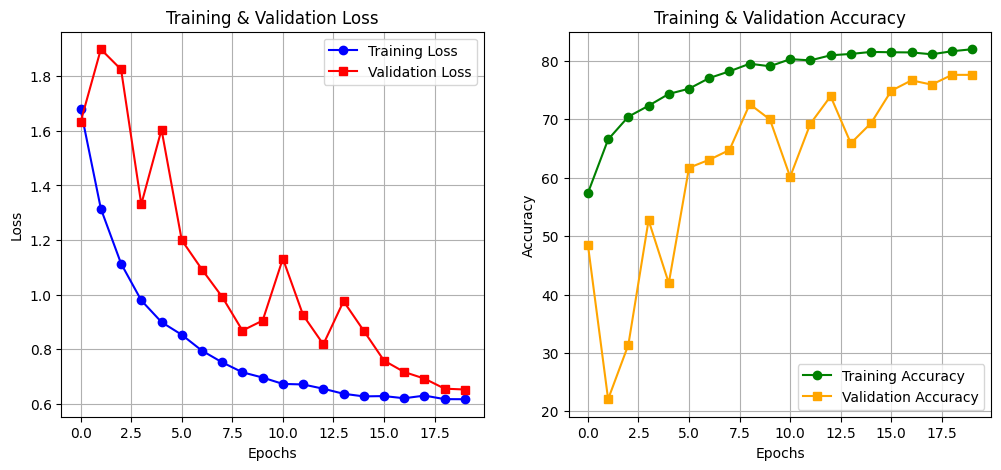


========== Evaluating MobileViT-Small V1 on Validation Set ==========


Overall Accuracy: 77.62%
Overall Error Rate: 22.38%
F1-Score (Macro-Averaged): 77.52%
F1-Score (Weighted): 77.51%
Matthews Correlation Coefficient (MCC): 73.94%
Cohen’s Kappa Score: 73.87%
Top-1 Accuracy (%): 77.62%
Top-5 Accuracy (%): 99.79%

Average Inference Time per Image: 0.220331 seconds

Class-Wise Performance Metrics:
   Class  Precision (%)  Recall (%)  F1-Score (%)  Specificity (%)
BRRI_108          83.55       77.44         80.38            96.84
 BRRI_28          71.71       85.16         77.86            94.81
 BRRI_29          72.58       66.18         69.23            95.85
 BRRI_34          77.50       66.91         71.81            96.70
 BRRI_50          81.89       85.25         83.53            97.24
 BRRI_74          83.21       83.21         83.21            97.19
    BR_5          72.92       80.77         76.64            95.28

Class-Wise Sample Distribution:
   Class  Support (Samples)
BR

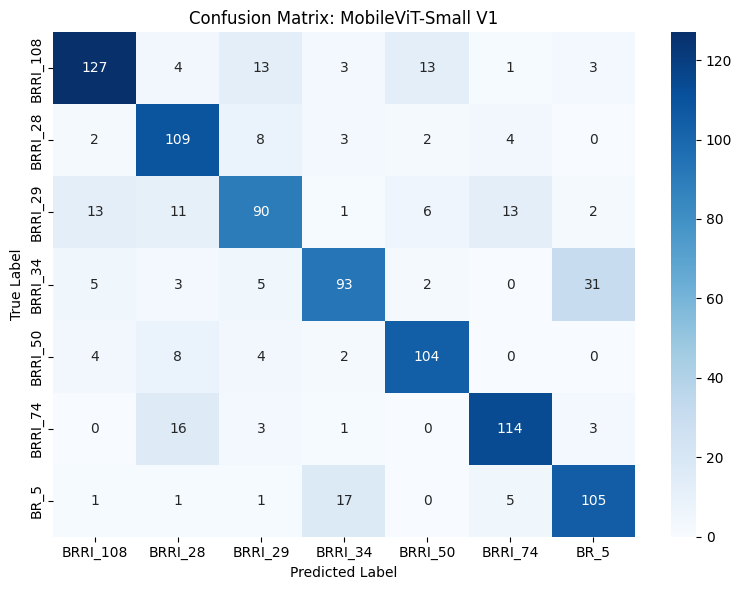

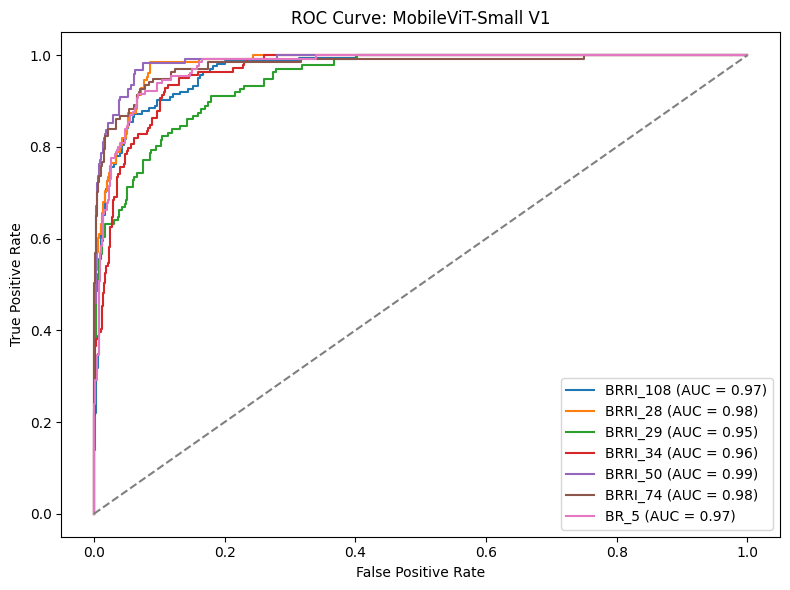

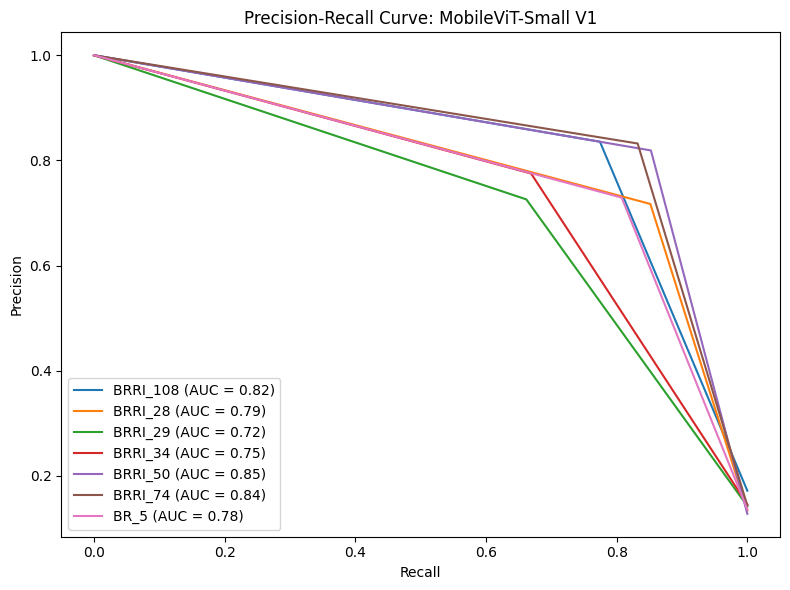


========== Evaluating MobileViT-Small V1 on Tesing Set ==========


Overall Accuracy: 82.78%
Overall Error Rate: 17.22%
F1-Score (Macro-Averaged): 82.61%
F1-Score (Weighted): 82.74%
Matthews Correlation Coefficient (MCC): 79.89%
Cohen’s Kappa Score: 79.87%
Top-1 Accuracy (%): 82.78%
Top-5 Accuracy (%): 98.96%

Average Inference Time per Image: 0.236415 seconds

Class-Wise Performance Metrics:
   Class  Precision (%)  Recall (%)  F1-Score (%)  Specificity (%)
BRRI_108          79.66       73.44         76.42            97.13
 BRRI_28          85.00       82.93         83.95            97.00
 BRRI_29          81.54       79.10         80.30            97.11
 BRRI_34          84.62       85.71         85.16            97.04
 BRRI_50          81.08       88.24         84.51            96.62
 BRRI_74          79.37       81.97         80.65            96.91
    BR_5          87.30       87.30         87.30            98.09

Class-Wise Sample Distribution:
   Class  Support (Samples)
BRRI_1

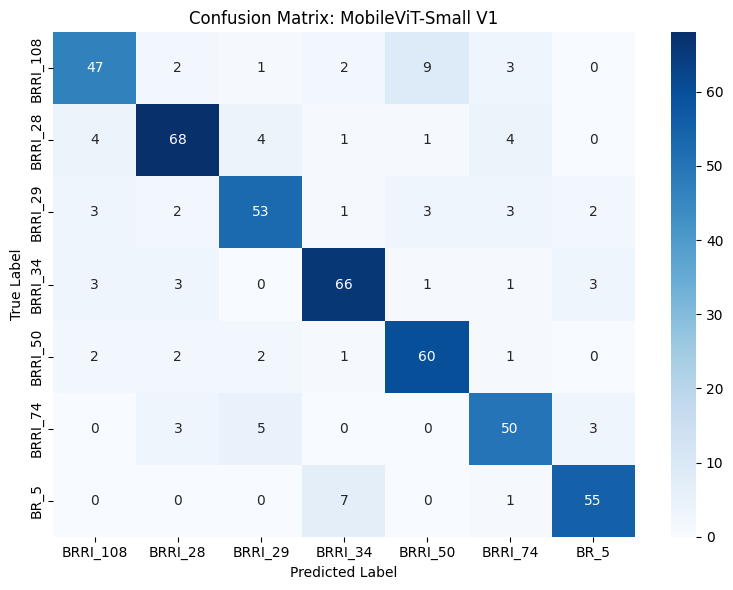

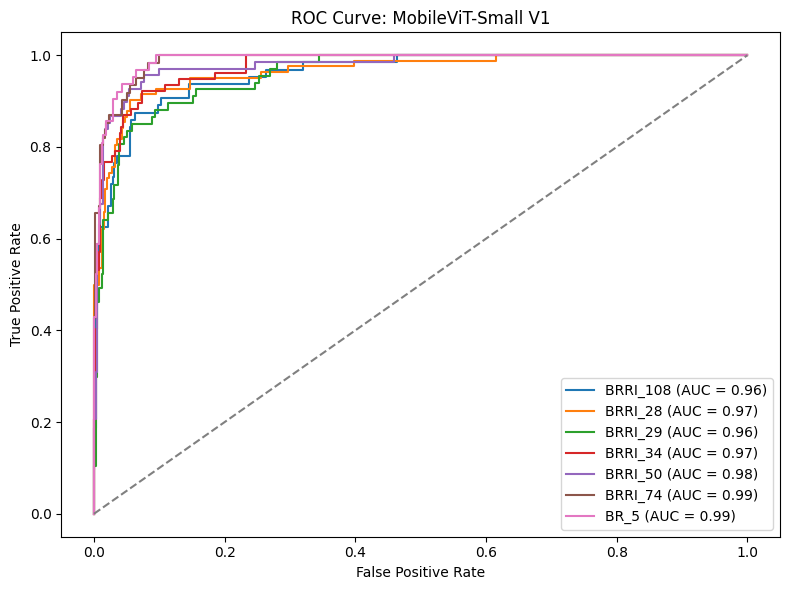

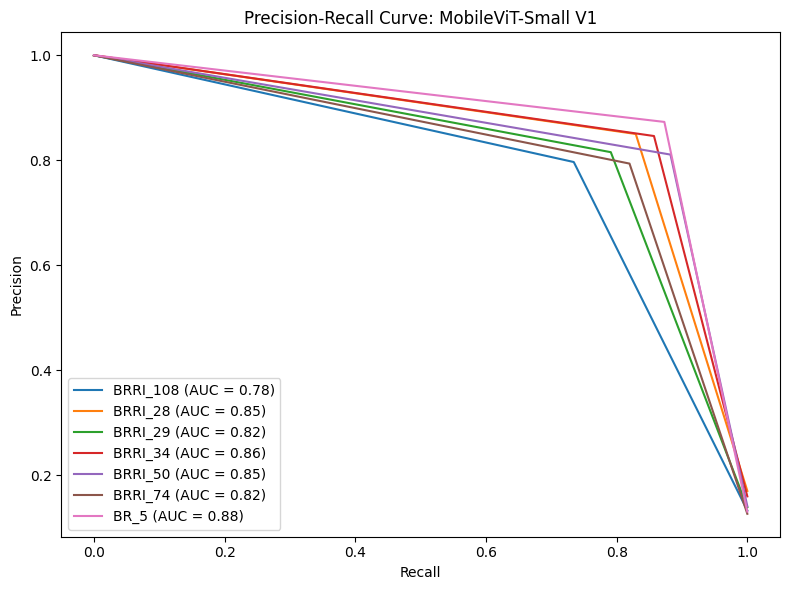

In [18]:
plotting(history1)
metrics = evaluate_model(model, val_loader, class_names=dataset.classes, loader_name="Validation", model_name="MobileViT-Small V1")
metrics = evaluate_model(model, test_loader, class_names=dataset.classes, loader_name="Tesing", model_name="MobileViT-Small V1")

In [20]:
save_model_artifacts(model=model,history=history1,metrics=metrics,model_name="MobileViT_small_Final",version="1")

Training metrics logged to /Users/tahfimibnkhan/Desktop/ViT_Final/RESULTS/logs/MobileViT_small_Final_training_metrics_1.json
Model saved to /Users/tahfimibnkhan/Desktop/ViT_Final/MODELS/MobileViT_small_Final/MobileViT_small_Final_1.pth
Evaluation metrics saved at: /Users/tahfimibnkhan/Desktop/ViT_Final/RESULTS/evaluation_logs/MobileViT_small_Final_evaluation_metrics_1.json
Class-wise metrics saved at: /Users/tahfimibnkhan/Desktop/ViT_Final/RESULTS/evaluation_logs/MobileViT_small_Final_class_wise_metrics_1.csv


In [21]:
import torch
import timm
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR

num_classes = 7
model2 = timm.create_model("mobilevit_s", pretrained=True, num_classes=num_classes)

for param in model2.parameters():
    param.requires_grad = False

for param in model2.stem.parameters():
    param.requires_grad = True
for param in model2.head.parameters():
    param.requires_grad = True

checkpoint_path = "/Users/tahfimibnkhan/Desktop/ViT_Final/MODELS/MobileViT_small_Final/MobileViT_small_Final_1.pth"
model2.load_state_dict(torch.load(checkpoint_path))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2.to(device)

print(f"Model reloaded as model2 from: {checkpoint_path}")
print(f"Only stem and head layers are trainable. Model moved to {device}")

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model2.parameters(), lr=5e-4, weight_decay=0.05)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=30)

Model reloaded as model2 from: /Users/tahfimibnkhan/Desktop/ViT_Final/MODELS/MobileViT_small_Final/MobileViT_small_Final_1.pth
Only stem and head layers are trainable. Model moved to cpu


In [23]:
history2=train(model2, train_loader, val_loader, criterion, optimizer, scheduler, epochs=30, patience=30)

Epoch 1/30: 100%|█████████████████████████████| 109/109 [17:50<00:00,  9.82s/it]


Epoch 1/30: Train Loss: 0.4748, Train Acc: 84.92% | Val Loss: 1.0390, Val Acc: 62.66%
Model improved. Saving checkpoint.


Epoch 2/30: 100%|█████████████████████████████| 109/109 [21:50<00:00, 12.02s/it]


Epoch 2/30: Train Loss: 0.4673, Train Acc: 86.22% | Val Loss: 1.3540, Val Acc: 46.65%
No improvement. Early stopping counter: 1/30


Epoch 3/30: 100%|█████████████████████████████| 109/109 [23:08<00:00, 12.74s/it]


Epoch 3/30: Train Loss: 0.4633, Train Acc: 86.34% | Val Loss: 0.7678, Val Acc: 71.13%
Model improved. Saving checkpoint.


Epoch 4/30: 100%|█████████████████████████████| 109/109 [25:12<00:00, 13.88s/it]


Epoch 4/30: Train Loss: 0.4522, Train Acc: 85.85% | Val Loss: 0.8208, Val Acc: 70.92%
No improvement. Early stopping counter: 1/30


Epoch 5/30: 100%|█████████████████████████████| 109/109 [23:02<00:00, 12.68s/it]


Epoch 5/30: Train Loss: 0.4307, Train Acc: 86.80% | Val Loss: 0.9345, Val Acc: 65.48%
No improvement. Early stopping counter: 2/30


Epoch 6/30: 100%|█████████████████████████████| 109/109 [22:18<00:00, 12.28s/it]


Epoch 6/30: Train Loss: 0.4436, Train Acc: 86.11% | Val Loss: 0.8016, Val Acc: 69.98%
No improvement. Early stopping counter: 3/30


Epoch 7/30: 100%|█████████████████████████████| 109/109 [21:56<00:00, 12.08s/it]


Epoch 7/30: Train Loss: 0.4309, Train Acc: 86.89% | Val Loss: 1.2154, Val Acc: 53.24%
No improvement. Early stopping counter: 4/30


Epoch 8/30: 100%|█████████████████████████████| 109/109 [21:35<00:00, 11.89s/it]


Epoch 8/30: Train Loss: 0.4337, Train Acc: 86.68% | Val Loss: 0.6442, Val Acc: 77.20%
Model improved. Saving checkpoint.


Epoch 9/30: 100%|█████████████████████████████| 109/109 [22:38<00:00, 12.46s/it]


Epoch 9/30: Train Loss: 0.4254, Train Acc: 87.18% | Val Loss: 0.6962, Val Acc: 74.06%
No improvement. Early stopping counter: 1/30


Epoch 10/30: 100%|████████████████████████████| 109/109 [22:16<00:00, 12.26s/it]


Epoch 10/30: Train Loss: 0.4302, Train Acc: 86.42% | Val Loss: 0.5893, Val Acc: 78.87%
Model improved. Saving checkpoint.


Epoch 11/30: 100%|████████████████████████████| 109/109 [21:27<00:00, 11.81s/it]


Epoch 11/30: Train Loss: 0.4162, Train Acc: 87.15% | Val Loss: 0.6622, Val Acc: 75.73%
No improvement. Early stopping counter: 1/30


Epoch 12/30: 100%|████████████████████████████| 109/109 [22:15<00:00, 12.26s/it]


Epoch 12/30: Train Loss: 0.4220, Train Acc: 86.89% | Val Loss: 0.5976, Val Acc: 78.77%
No improvement. Early stopping counter: 2/30


Epoch 13/30: 100%|████████████████████████████| 109/109 [22:36<00:00, 12.45s/it]


Epoch 13/30: Train Loss: 0.4184, Train Acc: 87.32% | Val Loss: 0.5374, Val Acc: 80.44%
Model improved. Saving checkpoint.


Epoch 14/30: 100%|████████████████████████████| 109/109 [20:57<00:00, 11.54s/it]


Epoch 14/30: Train Loss: 0.4202, Train Acc: 86.89% | Val Loss: 0.5694, Val Acc: 80.65%
No improvement. Early stopping counter: 1/30


Epoch 15/30: 100%|████████████████████████████| 109/109 [21:07<00:00, 11.63s/it]


Epoch 15/30: Train Loss: 0.4177, Train Acc: 87.06% | Val Loss: 0.5354, Val Acc: 79.29%
Model improved. Saving checkpoint.


Epoch 16/30: 100%|████████████████████████████| 109/109 [20:38<00:00, 11.36s/it]


Epoch 16/30: Train Loss: 0.4217, Train Acc: 87.06% | Val Loss: 0.5151, Val Acc: 81.69%
Model improved. Saving checkpoint.


Epoch 17/30: 100%|████████████████████████████| 109/109 [19:33<00:00, 10.77s/it]


Epoch 17/30: Train Loss: 0.4228, Train Acc: 86.19% | Val Loss: 0.5178, Val Acc: 80.75%
No improvement. Early stopping counter: 1/30


Epoch 18/30: 100%|████████████████████████████| 109/109 [20:46<00:00, 11.44s/it]


Epoch 18/30: Train Loss: 0.4139, Train Acc: 87.78% | Val Loss: 0.5255, Val Acc: 81.17%
No improvement. Early stopping counter: 2/30


Epoch 19/30: 100%|████████████████████████████| 109/109 [19:30<00:00, 10.74s/it]


Epoch 19/30: Train Loss: 0.4260, Train Acc: 87.23% | Val Loss: 0.5229, Val Acc: 79.81%
No improvement. Early stopping counter: 3/30


Epoch 20/30: 100%|████████████████████████████| 109/109 [20:38<00:00, 11.36s/it]


Epoch 20/30: Train Loss: 0.4255, Train Acc: 86.74% | Val Loss: 0.5274, Val Acc: 80.96%
No improvement. Early stopping counter: 4/30


Epoch 21/30: 100%|████████████████████████████| 109/109 [20:27<00:00, 11.26s/it]


Epoch 21/30: Train Loss: 0.4274, Train Acc: 86.66% | Val Loss: 0.5192, Val Acc: 80.86%
No improvement. Early stopping counter: 5/30


Epoch 22/30: 100%|████████████████████████████| 109/109 [20:59<00:00, 11.56s/it]


Epoch 22/30: Train Loss: 0.4224, Train Acc: 86.92% | Val Loss: 0.5187, Val Acc: 81.28%
No improvement. Early stopping counter: 6/30


Epoch 23/30: 100%|████████████████████████████| 109/109 [20:47<00:00, 11.45s/it]


Epoch 23/30: Train Loss: 0.4150, Train Acc: 87.35% | Val Loss: 0.7454, Val Acc: 72.07%
No improvement. Early stopping counter: 7/30


Epoch 24/30: 100%|████████████████████████████| 109/109 [20:10<00:00, 11.10s/it]


Epoch 24/30: Train Loss: 0.4259, Train Acc: 86.86% | Val Loss: 0.5888, Val Acc: 79.18%
No improvement. Early stopping counter: 8/30


Epoch 25/30: 100%|████████████████████████████| 109/109 [21:51<00:00, 12.04s/it]


Epoch 25/30: Train Loss: 0.4263, Train Acc: 87.26% | Val Loss: 0.6974, Val Acc: 74.06%
No improvement. Early stopping counter: 9/30


Epoch 26/30: 100%|████████████████████████████| 109/109 [20:45<00:00, 11.43s/it]


Epoch 26/30: Train Loss: 0.4260, Train Acc: 87.03% | Val Loss: 0.5750, Val Acc: 79.81%
No improvement. Early stopping counter: 10/30


Epoch 27/30: 100%|████████████████████████████| 109/109 [23:23<00:00, 12.87s/it]


Epoch 27/30: Train Loss: 0.4221, Train Acc: 87.61% | Val Loss: 0.6403, Val Acc: 77.72%
No improvement. Early stopping counter: 11/30


Epoch 28/30: 100%|████████████████████████████| 109/109 [27:23<00:00, 15.08s/it]


Epoch 28/30: Train Loss: 0.4281, Train Acc: 86.92% | Val Loss: 0.7821, Val Acc: 71.23%
No improvement. Early stopping counter: 12/30


Epoch 29/30: 100%|████████████████████████████| 109/109 [26:14<00:00, 14.44s/it]


Epoch 29/30: Train Loss: 0.4108, Train Acc: 87.18% | Val Loss: 0.8206, Val Acc: 67.05%
No improvement. Early stopping counter: 13/30


Epoch 30/30: 100%|████████████████████████████| 109/109 [23:56<00:00, 13.18s/it]


Epoch 30/30: Train Loss: 0.4254, Train Acc: 86.80% | Val Loss: 0.9669, Val Acc: 63.28%
No improvement. Early stopping counter: 14/30


{'train_loss': [0.4748255235886355,
  0.46726278892350853,
  0.46331933974672895,
  0.45216229216221276,
  0.43069311183526976,
  0.4436061941429016,
  0.4309123195366028,
  0.43366962247485413,
  0.4253775121968821,
  0.43021372193043383,
  0.41622575249420396,
  0.4220087880935144,
  0.41841628450319307,
  0.4202430384968399,
  0.4177360399327147,
  0.42174460021180843,
  0.4227561200157218,
  0.4139003827484376,
  0.42595582120462294,
  0.42550007247049876,
  0.4273975364385395,
  0.4223982622043802,
  0.4149780746446837,
  0.4259271824031795,
  0.4263264978424125,
  0.4259545598008217,
  0.4221052336036612,
  0.4280957597384759,
  0.4108219446118819,
  0.4253894867153343],
 'train_acc': [84.92201039861352,
  86.22183708838821,
  86.3373772385904,
  85.84633160023108,
  86.79953783939919,
  86.10629693818602,
  86.88619295205083,
  86.683997689197,
  87.17504332755632,
  86.42403235124206,
  87.14615829000577,
  86.88619295205083,
  87.31946851530907,
  86.88619295205083,
  87.05950

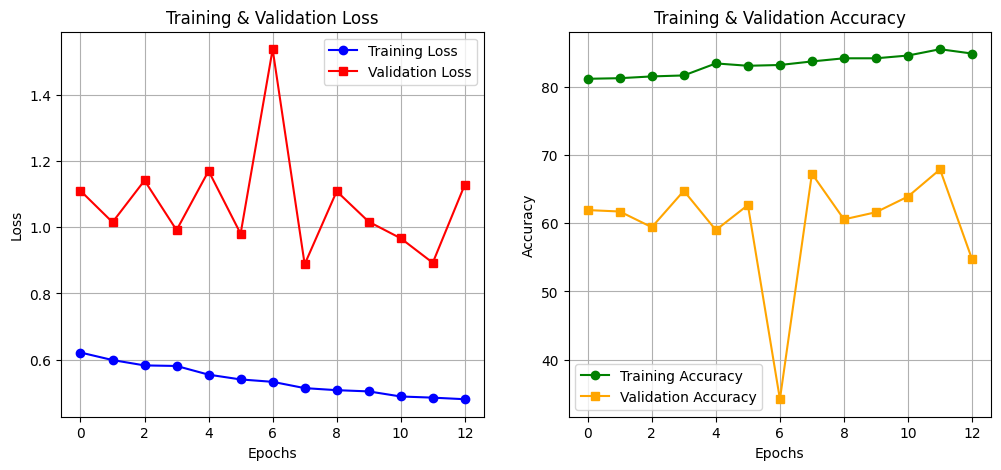


========== Evaluating MobileViT-Small V2 on Validation Set ==========


Overall Accuracy: 63.28%
Overall Error Rate: 36.72%
F1-Score (Macro-Averaged): 62.57%
F1-Score (Weighted): 62.58%
Matthews Correlation Coefficient (MCC): 58.85%
Cohen’s Kappa Score: 57.26%
Top-1 Accuracy (%): 63.28%
Top-5 Accuracy (%): 98.95%

Average Inference Time per Image: 0.141959 seconds

Class-Wise Performance Metrics:
   Class  Precision (%)  Recall (%)  F1-Score (%)  Specificity (%)
BRRI_108          81.25       47.56         60.00            97.73
 BRRI_28          85.71       46.88         60.61            98.79
 BRRI_29          70.13       39.71         50.70            97.20
 BRRI_34          54.34       85.61         66.48            87.76
 BRRI_50          43.94       95.08         60.10            82.25
 BRRI_74          72.96       84.67         78.38            94.75
    BR_5          87.32       47.69         61.69            98.91

Class-Wise Sample Distribution:
   Class  Support (Samples)
BR

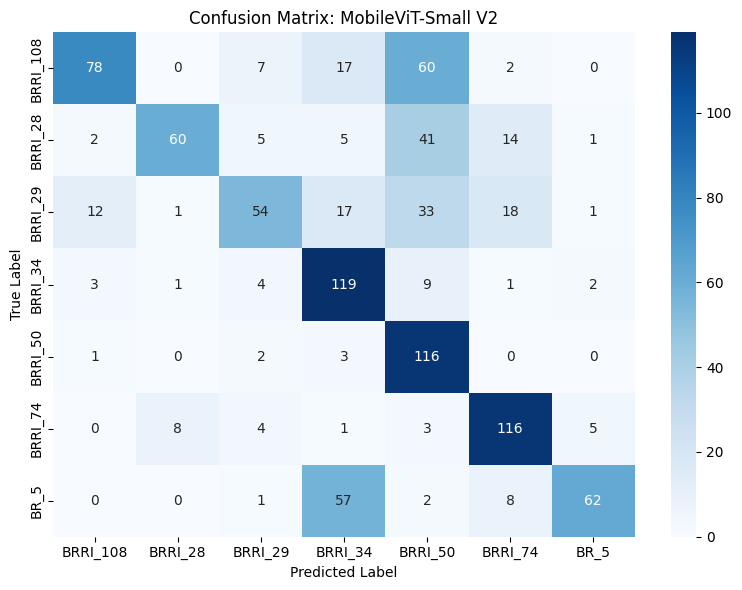

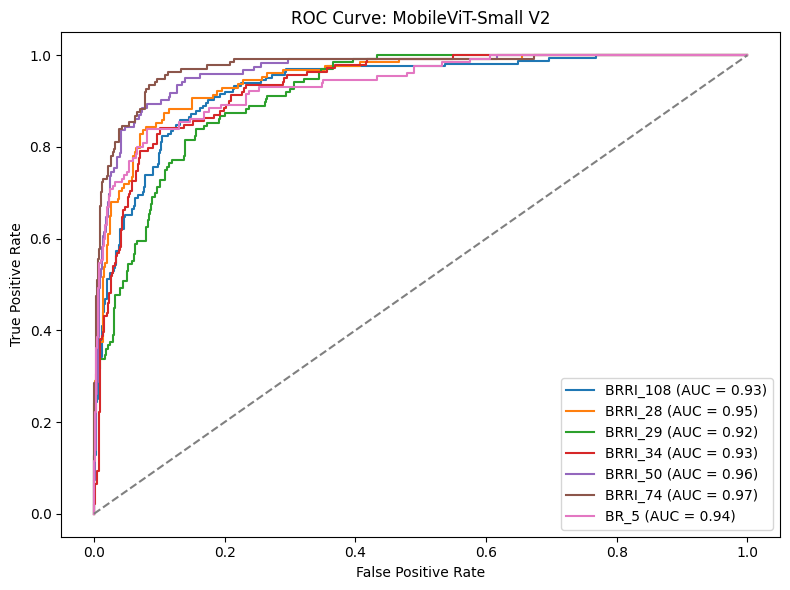

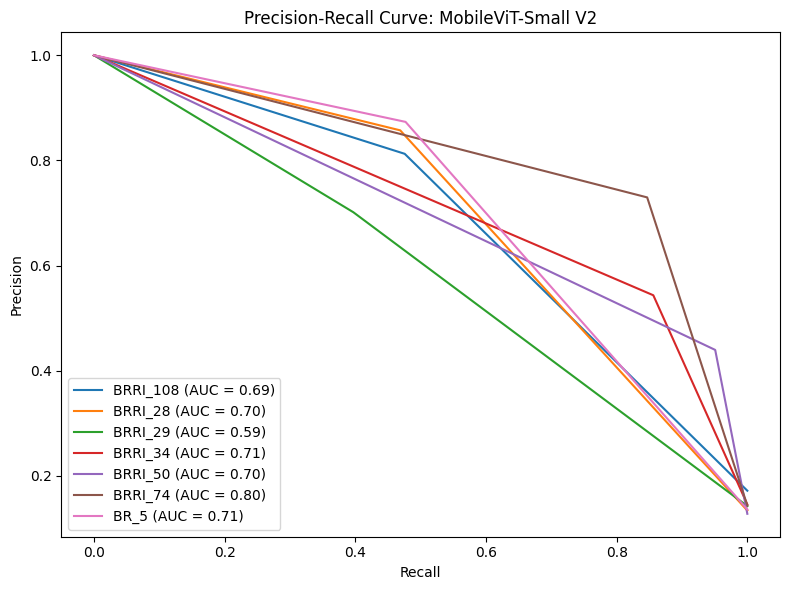


========== Evaluating MobileViT-Small V2 on Tesing Set ==========


Overall Accuracy: 63.07%
Overall Error Rate: 36.93%
F1-Score (Macro-Averaged): 61.73%
F1-Score (Weighted): 61.62%
Matthews Correlation Coefficient (MCC): 58.39%
Cohen’s Kappa Score: 56.85%
Top-1 Accuracy (%): 63.07%
Top-5 Accuracy (%): 99.17%

Average Inference Time per Image: 0.164520 seconds

Class-Wise Performance Metrics:
   Class  Precision (%)  Recall (%)  F1-Score (%)  Specificity (%)
BRRI_108          71.19       65.62         68.29            95.93
 BRRI_28          88.37       46.34         60.80            98.75
 BRRI_29          76.47       38.81         51.49            98.07
 BRRI_34          53.98       79.22         64.21            87.16
 BRRI_50          46.72       94.12         62.44            82.37
 BRRI_74          75.00       88.52         81.20            95.72
    BR_5          79.17       30.16         43.68            98.81

Class-Wise Sample Distribution:
   Class  Support (Samples)
BRRI_1

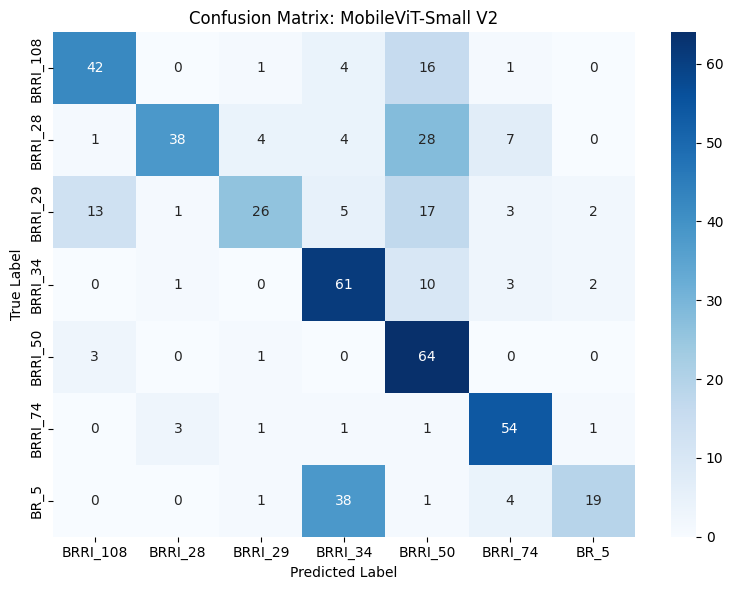

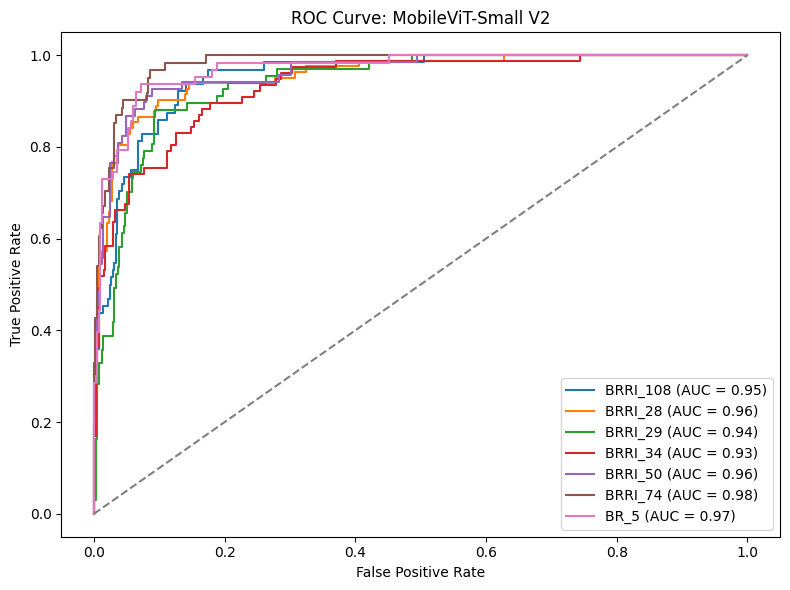

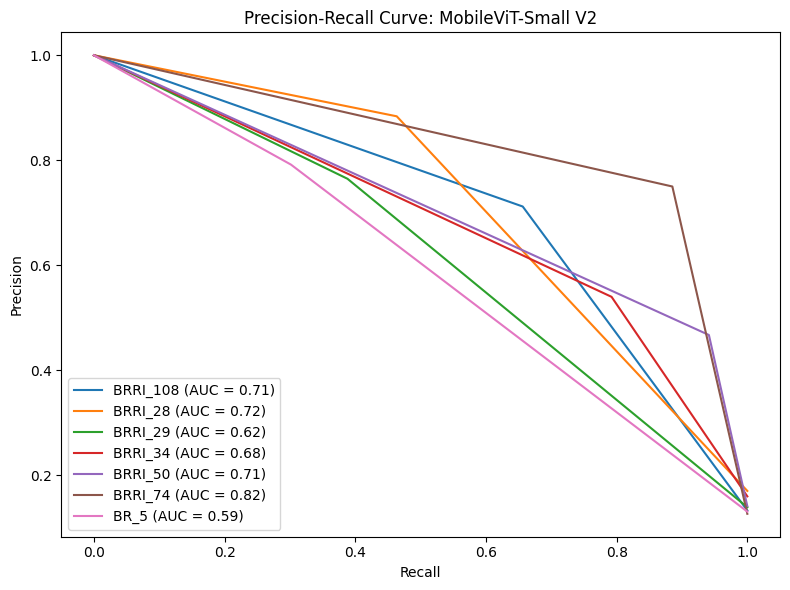

In [24]:
plotting(history2)
metrics = evaluate_model(model2, val_loader, class_names=dataset.classes, loader_name="Validation", model_name="MobileViT-Small V2")
metrics = evaluate_model(model2, test_loader, class_names=dataset.classes, loader_name="Tesing", model_name="MobileViT-Small V2")